<a href="https://colab.research.google.com/github/jhomivlz98/PROGRAMACION-CLASES/blob/master/Copia_de_clase12_spatial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install fiona
!pip install geopandas
!pip install descartes
!pip install mapclassify 

     |████████████████████████████████| 11.8MB 179kB/s 
     |████████████████████████████████| 921kB 2.8MB/s 
     |████████████████████████████████| 10.1MB 43.4MB/s 
  Created wheel for mapclassify: filename=mapclassify-2.1.1-cp36-none-any.whl size=29001 sha256=f2c4dd9bf38b9d8f83aeb55edc83cdee9090fe6b7ee0ecab65741dede8a5b694
  Stored in directory: /root/.cache/pip/wheels/fc/b8/58/56b650743289cbecb476ef1fc50ab0aeaa0b12e56ad912d624
Successfully built mapclassify


In [8]:
import pandas as pd 
df=pd.read_csv("/content/earthquakes.csv")
df.head(9)

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
0,2002/01/01 10:39:06.82,-55.214,-129.000,10.0,6.0,Mw,78.0,NaN,NaN,1.07,NEI,2.002010e+11
1,2002/01/01 11:29:22.73,6.303,125.650,138.1,6.3,Mw,236.0,NaN,NaN,0.90,NEI,2.002010e+11
2,2002/01/02 14:50:33.49,-17.983,178.744,665.8,6.2,Mw,215.0,NaN,NaN,1.08,NEI,2.002010e+11
3,2002/01/02 17:22:48.76,-17.600,167.856,21.0,7.2,Mw,427.0,NaN,NaN,0.90,NEI,2.002010e+11
4,2002/01/03 07:05:27.67,36.088,70.687,129.3,6.2,Mw,431.0,NaN,NaN,0.87,NEI,2.002010e+11
5,2002/01/03 10:17:36.30,-17.664,168.004,10.0,6.6,Mw,386.0,NaN,NaN,1.14,NEI,2.002010e+11
6,2002/01/10 11:14:56.93,-3.212,142.427,11.0,6.7,Mw,333.0,NaN,NaN,1.18,NEI,2.002011e+11
7,2002/01/13 14:10:56.52,-5.651,151.074,43.6,6.4,Mw,441.0,NaN,NaN,1.06,NEI,2.002011e+11
8,2002/01/15 04:47:59.85,-17.334,167.722,10.0,6.0,Mw,173.0,NaN,NaN,1.09,NEI,2.002012e+11


In [11]:
df[(df["Magnitude"]>7) & (df["Latitude"]< 0)]


,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
3,2002/01/02 17:22:48.76,-17.6000,167.8560,21.00,7.2,Mw,427.0,NaN,NaN,0.90,NEI,2.002010e+11
74,2002/08/19 11:01:01.19,-21.6960,-179.5130,580.00,7.7,Mw,670.0,NaN,NaN,0.93,NEI,2.002082e+11
75,2002/08/19 11:08:24.31,-23.8840,178.4950,675.40,7.7,Mw,302.0,NaN,NaN,1.08,NEI,2.002082e+11
83,2002/09/08 18:44:23.71,-3.3020,142.9450,13.00,7.6,Mw,428.0,NaN,NaN,1.16,NEI,2.002091e+11
99,2002/10/10 10:50:20.57,-1.7570,134.2970,10.00,7.6,Mw,375.0,NaN,NaN,1.15,NEI,2.002101e+11
...,...,...,...,...,...,...,...,...,...,...,...,...
2356,2016/08/29 04:29:57.88,-0.0471,-17.8294,10.00,7.1,Mw,NaN,24.0,9.0,0.88,us,2.016083e+11
2384,2016/11/13 11:02:56.35,-42.7358,173.0499,15.22,7.8,Mw,NaN,21.0,0.0,0.57,us,2.016111e+11
2398,2016/12/08 17:38:46.28,-10.6787,161.3214,40.00,7.8,Mw,NaN,13.0,2.0,0.87,us,2.016121e+11
2403,2016/12/17 10:51:10.50,-4.5049,153.5216,94.54,7.9,Mw,NaN,13.0,1.0,0.97,us,2.016122e+11


In [12]:
df[df["Magnitude"].between(8,9)]# &: y, |: o

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
243,2003/09/25 19:50:06.36,41.8150,143.9100,27.00,8.3,Mw,669.0,NaN,NaN,0.88,NEI,2.003093e+11
433,2004/12/23 14:59:04.41,-49.3120,161.3450,10.00,8.1,Mw,331.0,NaN,NaN,1.12,NEI,2.004122e+11
434,2004/12/26 00:58:53.45,3.2950,95.9820,30.00,9.0,Mw,601.0,NaN,NaN,1.17,NEI,2.004123e+11
500,2005/03/28 16:09:36.53,2.0850,97.1080,30.00,8.6,Mw,510.0,NaN,NaN,0.91,NEI,2.005033e+11
649,2006/05/03 15:26:40.29,-20.1870,-174.1230,55.00,8.0,Mw,626.0,NaN,NaN,1.18,NEI,2.006050e+11
728,2006/11/15 11:14:13.57,46.5920,153.2660,10.00,8.3,Mw,576.0,NaN,NaN,1.07,NEI,2.006112e+11
757,2007/01/13 04:23:21.16,46.2430,154.5240,10.00,8.1,Mw,606.0,NaN,NaN,1.12,NEI,2.007011e+11
791,2007/04/01 20:39:58.71,-8.4660,157.0430,24.00,8.1,Mw,439.0,NaN,NaN,1.32,NEI,2.007040e+11
867,2007/08/15 23:40:57.89,-13.3860,-76.6030,39.00,8.0,Me,625.0,NaN,NaN,0.86,NEI,2.007082e+11
882,2007/09/12 11:10:26.83,-4.4380,101.3670,34.00,8.5,Me,411.0,NaN,NaN,1.03,NEI,2.007091e+11


In [3]:
import pandas as pd 
df=pd.read_csv("/content/earthquakes.csv")
df

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
0,2002/01/01 10:39:06.82,-55.2140,-129.0000,10.0,6.0,Mw,78.0,NaN,NaN,1.07,NEI,2.002010e+11
1,2002/01/01 11:29:22.73,6.3030,125.6500,138.1,6.3,Mw,236.0,NaN,NaN,0.90,NEI,2.002010e+11
2,2002/01/02 14:50:33.49,-17.9830,178.7440,665.8,6.2,Mw,215.0,NaN,NaN,1.08,NEI,2.002010e+11
3,2002/01/02 17:22:48.76,-17.6000,167.8560,21.0,7.2,Mw,427.0,NaN,NaN,0.90,NEI,2.002010e+11
4,2002/01/03 07:05:27.67,36.0880,70.6870,129.3,6.2,Mw,431.0,NaN,NaN,0.87,NEI,2.002010e+11
...,...,...,...,...,...,...,...,...,...,...,...,...
2408,2016/12/20 12:33:14.24,-10.1785,160.9149,10.0,6.0,Mw,NaN,14.0,1.0,0.88,us,2.016122e+11
2409,2016/12/21 00:17:14.99,-7.5082,127.9206,152.0,6.7,Mw,NaN,17.0,3.0,1.20,us,2.016122e+11
2410,2016/12/24 01:32:16.04,-5.2453,153.5754,35.0,6.0,Mw,NaN,13.0,2.0,0.91,us,2.016122e+11
2411,2016/12/25 14:22:27.05,-43.4029,-73.9395,38.0,7.6,Mw,NaN,29.0,0.0,0.80,us,2.016123e+11


In [4]:
df.iloc()
df


## 01_Describe

In [0]:
import fiona 
import pprint

In [0]:
import fiona
import pprint

In [14]:
data_path = "/content/TM_WORLD_BORDERS-0.3.shp"
c = fiona.open(data_path)

NameError: ignored

In [15]:
import fiona 
import pprint
data_path = "/content/TM_WORLD_BORDERS-0.3.shp"
c = fiona.open(data_path)

ModuleNotFoundError: ignored

In [0]:
print(c.driver)
print(c.crs)
print(len(c))
print(c.bounds)
pprint.pprint(c.schema)

## 02_Transform

In [0]:
schema = { 'geometry': 'Point', 'properties': { 'depth': 'float:7.3', 'magnitude' : 'float:7.3' } }

In [0]:
with collection("earthquakes.shp", "w", crs=from_epsg(4326), driver='ESRI Shapefile', schema=schema) as output:
    with open('earthquakes.csv', 'r') as f:
        reader = csv.DictReader(f)
        for row in reader:
            point = Point(float(row['Longitude']), float(row['Latitude']))
            output.write({
                'properties': {
                    'depth': row['Depth'],'magnitude': row['Magnitude']
                },
                'geometry': mapping(point)
            })

In [0]:
import csv
from shapely.geometry import Point, mapping
from fiona import collection
from fiona.crs import from_epsg

## 03_Geocoding

In [0]:
from geopy.geocoders import Nominatim

In [28]:
geolocator = Nominatim()
location = geolocator.geocode("Estadio de la UNMSM, Avenida Carlos Germán Amezaga, Urbanizacion Las Brisas, Lima, CALLAO 02, Perú")

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [29]:
print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

Estadio de la UNMSM, Avenida Carlos Germán Amezaga, Urbanizacion Las Brisas, Lima, CALLAO 02, Peru
(-12.0575831, -77.0832579438947)
{'place_id': 122919416, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 201423236, 'boundingbox': ['-12.0587669', '-12.0562169', '-77.0842092', '-77.0822912'], 'lat': '-12.0575831', 'lon': '-77.0832579438947', 'display_name': 'Estadio de la UNMSM, Avenida Carlos Germán Amezaga, Urbanizacion Las Brisas, Lima, CALLAO 02, Peru', 'class': 'leisure', 'type': 'stadium', 'importance': 1.7171516336244852}


Geocoding inverso

In [30]:
geolocator = Nominatim()
location = geolocator.reverse("-12.057615, -77.082842")
print(location.address)

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


Estadio de la UNMSM, Avenida Carlos Germán Amezaga, Urbanizacion Las Brisas, Lima, CALLAO 02, Peru


## 04_Geopandas

In [0]:
import geopandas as gp
%matplotlib inline
pth = "/content/earthquakes.shp"
world = gp.GeoDataFrame.from_file(pth)

In [47]:
world.head(3)

,depth,magnitude,geometry
0,10.0,6.0,POINT (-129.00000 -55.21400)
1,138.1,6.3,POINT (125.65000 6.30300)
2,665.8,6.2,POINT (178.74400 -17.98300)


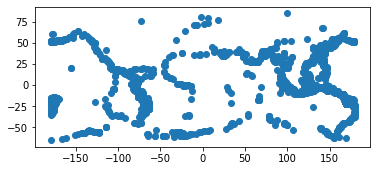

In [38]:
world.plot()

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:482: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


TypeError: ignored

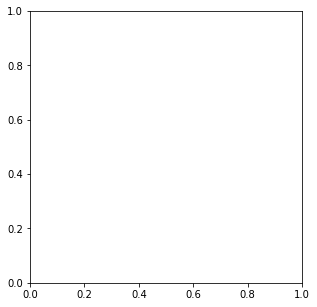

In [53]:
world.plot(column='geometry', scheme='QUANTILES', k=5, colormap='OrRd',  legend=True,  figsize=(20, 5))

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:482: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  FutureWarning,


KeyError: ignored

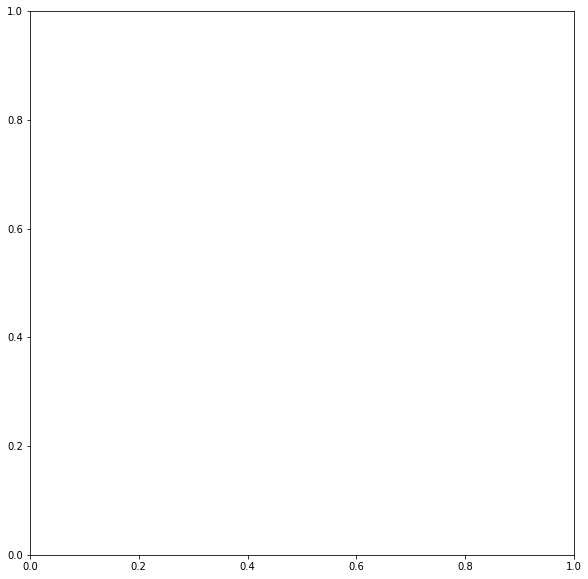

In [46]:
world.plot(column='POP2005', scheme='fisher_jenks', k=5, colormap='OrRd',  legend=True, figsize=(16, 10))

***
## Ejercicio

Leer los datos

In [0]:
import pandas as pd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona

In [0]:
from datetime import datetime

In [42]:
data = pd.read_csv('earthquakes.csv')
data.head()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
0,2002/01/01 10:39:06.82,-55.214,-129.000,10.0,6.0,Mw,78.0,NaN,NaN,1.07,NEI,2.002010e+11
1,2002/01/01 11:29:22.73,6.303,125.650,138.1,6.3,Mw,236.0,NaN,NaN,0.90,NEI,2.002010e+11
2,2002/01/02 14:50:33.49,-17.983,178.744,665.8,6.2,Mw,215.0,NaN,NaN,1.08,NEI,2.002010e+11
3,2002/01/02 17:22:48.76,-17.600,167.856,21.0,7.2,Mw,427.0,NaN,NaN,0.90,NEI,2.002010e+11
4,2002/01/03 07:05:27.67,36.088,70.687,129.3,6.2,Mw,431.0,NaN,NaN,0.87,NEI,2.002010e+11


In [0]:
geometry = [Point(xy) for xy in zip(data.Longitude, data.Latitude)]
crs = {'init': 'epsg:4326'} #https://www.spatialreferen%matplotlib inline
geo_df.plot()ce.org/ref/epsg/4326/
geo_df = GeoDataFrame(data, crs=crs, geometry=geometry)

# geo_df.to_file(driver='ESRI Shapefile', filename='data.shp')

In [0]:
%matplotlib inline
geo_df.plot()

In [45]:
geo_df = geo_df.drop(columns=['DateTime'])
gjson = geo_df.to_crs(epsg='4326').to_json()

NameError: ignored

In [0]:
import folium

In [0]:
mapa = folium.Map([-8.783333, -74.866667], zoom_start=4, tiles='cartodbpositron')
points = folium.features.GeoJson(gjson)
mapa.add_children(points)
mapa